# Spectral Analysis of Deterministic Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Short-Time Fourier Transformation


The DFT is not very well suited for the analysis of instationary signals when applied to the entire signal. Practical signals, for instance an antenna signal, cannot be analyzed in an on-line manner by the DFT. This motivates to split a long signal into segments and compute the DFT on these segments. This transformation is known as the [short-time Fourier transformation](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT).

The STFT $ X[\mu, n]$ of a signal $x[k]$ is defined as

$$ X[\mu, n] = \sum_{k = n}^{n+N-1} x[k] \, w[k-n] \; w_N^{k \mu}$$

where $w_N^{k \mu} = e^{-j \frac{2 \pi}{N}}$ denotes the kernel of the DFT and $w[k]$ a window function of length $N$ which is normalized by $\sum_{k=0}^{N-1} w[k] = 1$. Starting from $k=n$, the signal $x[k]$ is windowed by $w[k]$ to a segment of length $N$. This windowed segment is then transformed by a DFT of length $N$.

The STFT has many applications in digital signal processing. For instance in the spectral analysis of signals or the processing of instationary signals. The resulting spectrum $X[\mu, n]$ depends on the frequency index $\mu$ and the time index $n$. It is therefore also termed as [time-frequency domain](https://en.wikipedia.org/wiki/Time%E2%80%93frequency_representation) and techniques using the STFT as time-frequency processing.

The properties of the STFT depend on

* the length $N$ of the segments,
* the overlap between the segments, and
* the window function $w[k]$.

The size $N$ of the segments and the window function influence the spectral and temporal resolution of the STFT. The time index $n$ of the STFT $n$ can be increased by an arbitrary stepsize. The stepsize determines the overlap between two consecutive SFFTs. For instance the spectra $X[\mu, n]$ and $X[\mu, n+1]$ have $N-1$ overlapping samples. The overlap is sometimes also given as percentage of the segment length $N$.

## The Spectrogram

The magnitude $|X[\mu, n]|$ is known as the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) of a signal. It is frequently used to analyze signals in the time-frequency domain. For instance by a [spectrum analyzer](https://en.wikipedia.org/wiki/Spectrum_analyzer). The following example computes the spectrogram of an unknown signal

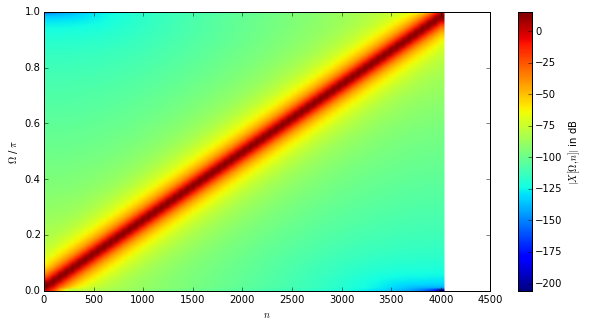

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


N = 8192  # length of the signal
L = 256  # length of one segment
overlap = 128  # overlap between segments


# generate signal
k = np.arange(N)
x = sig.chirp(k, 0, N, .5)

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
cb.set_label(r'$|X[\Omega,n]|$ in dB')

**Exercise**

* Can you characterize the signal from its spectrogram? How would it sound like?
* Change the segment length `L` and the overlap `overlap` between segments. Rerun the cell. What changes in the spectrogram?

** Copyright **

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>